Install

In [ ]:
!pip install pystan fbprophet

In [ ]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import itertools
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from sklearn.metrics import mean_squared_log_error

In [ ]:
data_k = pd.read_csv("/content/drive/MyDrive/BRIHackathon/train.csv", usecols=["periode","kas_kantor"])
data_e = pd.read_csv("/content/drive/MyDrive/BRIHackathon/train.csv", usecols=["periode","kas_echannel"])

In [ ]:
data_k.head()

,periode,cash_in_kantor,cash_out_kantor,kas_kantor
0,2019-07-31,1.436722e+11,-1.106104e+11,1.928940e+09
1,2019-08-01,3.144131e+11,-6.710987e+10,2.492322e+11
2,2019-08-02,1.251294e+09,-1.142332e+09,2.493411e+11
3,2019-08-03,0.000000e+00,0.000000e+00,2.493411e+11
4,2019-08-04,9.883331e+10,-8.729274e+10,2.608817e+11


In [ ]:
data_e.head()

,ds,y
0,2019-07-31,2.939100e+09
1,2019-08-01,2.839150e+09
2,2019-08-02,3.387550e+09
3,2019-08-03,3.876950e+09
4,2019-08-04,3.874250e+09


Convert periode ke datetime

In [ ]:
data_k["periode"] = pd.to_datetime(data_k["periode"])
data_e["periode"] = pd.to_datetime(data_e["periode"])

data_k.dtypes
data_e.dtypes

periode         datetime64[ns]
kas_echannel           float64
dtype: object

Rename kolom

In [ ]:
data_k.columns = ["ds","y"]
data_e.columns = ["ds","y"]

Plot

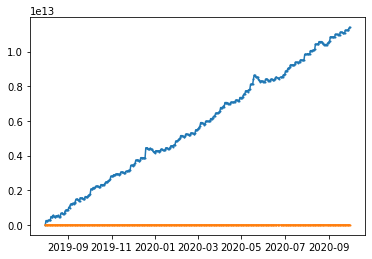

In [ ]:
plt.plot(data_k.ds, data_k.y, "-o", markersize=1)

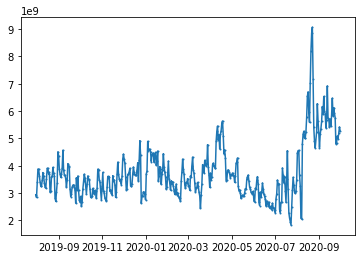

In [ ]:
plt.plot(data_e.ds, data_e.y, "-o", markersize=1)

Train

In [ ]:
pk = Prophet()
pe = Prophet()

model_k = pk.fit(data_k)
model_e = pe.fit(data_e)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.8,0.9,0.95]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
err = []  # Store the RMSEs for each params here


for params in all_params:
    m = Prophet(**params).fit(data_e)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes")
    # df_p = performance_metrics(df_cv, rolling_window=1)
    rmsle = mean_squared_log_error(y_true=df_cv['y'], y_pred=df_cv['yhat']) ** 0.5
    # err.append(df_p['rmse'].values[0])
    err.append(rmsle)


tuning_results = pd.DataFrame(all_params)
tuning_results['rmsle'] = err
# print(tuning_results)
tuning_results.to_csv("/content/drive/MyDrive/BRIHackathon/echan.csv")

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 21 forecasts with cutoffs between 2019-11-05 00:00:00 and 2020-08-31 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f55acecce10>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 21 forecasts with cutoffs between 2019-11-05 00:00:00 and 2020-08-31 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f55ab687c50>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
IN

In [ ]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
err = []  # Store the RMSEs for each params here


for params in all_params:
    m = Prophet(**params).fit(data_e)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    err.append(df_p['rmse'].values[0])


tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = err
print(tuning_results)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 21 forecasts with cutoffs between 2019-11-05 00:00:00 and 2020-08-31 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fc402614dd8>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 21 forecasts with cutoffs between 2019-11-05 00:00:00 and 2020-08-31 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fc40260ab38>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophe

Predict

In [ ]:
future_k = pk.make_future_dataframe(periods=31, freq="D")
pred_k = pk.predict(future_k)
future_e = pe.make_future_dataframe(periods=31, freq="D")
pred_e = pe.predict(future_e)

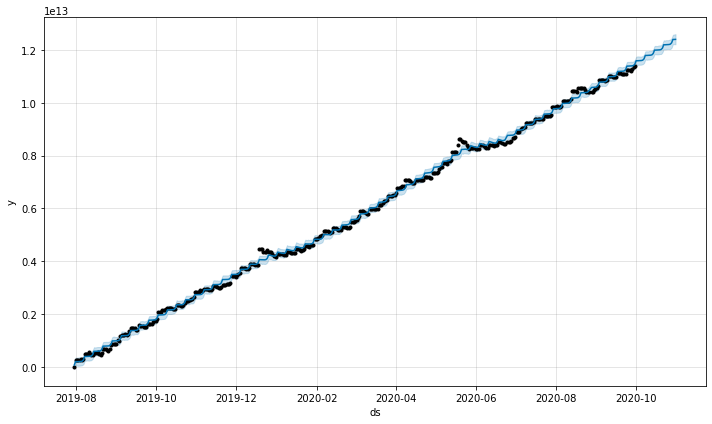

In [ ]:
plot_k = pk.plot(pred_k)

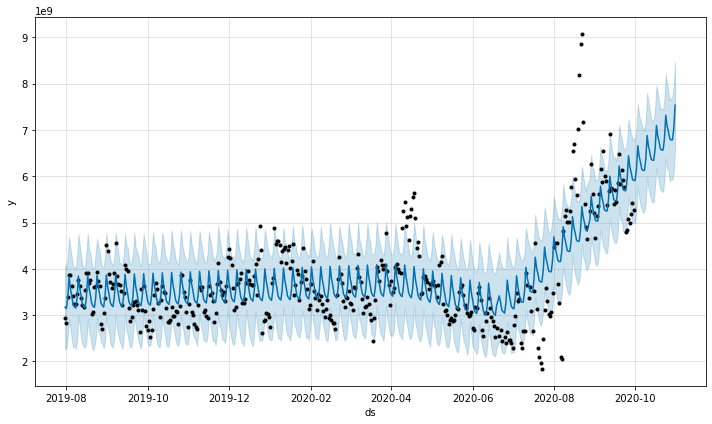

In [ ]:
plot_e = pe.plot(pred_e)